In [2]:
mkdir data

In [3]:
!wget https://www.dropbox.com/s/t2ea8g3cjoqdt4r/test.zip && unzip -q test.zip -d data/

--2018-07-01 01:18:53--  https://www.dropbox.com/s/t2ea8g3cjoqdt4r/test.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t2ea8g3cjoqdt4r/test.zip [following]
--2018-07-01 01:18:53--  https://www.dropbox.com/s/raw/t2ea8g3cjoqdt4r/test.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uceb3ff9e1c9240ba3bdc925aae9.dl.dropboxusercontent.com/cd/0/inline/AKPaMOTBr-1f26mCcgpGaZN5d-NSaxw3SV7PxP37GD86fFiEU1SaY8doiC4MBFrPvkV-VHnFcl0mNraSyY1Dxxjiec9Go0iIr_BjvMWZGoGqIy8sTLcslmo7MZQj3ialmpbeeKtL4yoI_EE3GkvIZxIkp2_HJY0-iZqhN8pXuzTKU-I-hgUYh28H5LRjZUiQCd8/file [following]
--2018-07-01 01:18:53--  https://uceb3ff9e1c9240ba3bdc925aae9.dl.dropboxusercontent.com/cd/0/inline/AKPaMOTBr-1f26mCcgpGaZN5d-NSaxw3SV7PxP37GD86fFiEU1SaY8doiC4MBFrPvkV-VHnFcl

test.zip            100%[===================>] 322.93M  29.6MB/s    in 14s     

2018-07-01 01:19:09 (23.8 MB/s) - ‘test.zip’ saved [338612331/338612331]



In [4]:
ls data

test/


In [5]:
import matplotlib.pyplot as plt
import glob

In [6]:
import os

In [7]:
import numpy as np

In [8]:
import cv2

In [9]:
import pandas as pd

In [10]:
from google.colab import files
f = files.upload()

Saving submission-ensembled-12_6.csv to submission-ensembled-12_6.csv
Saving submission-ensembled-11_6.csv to submission-ensembled-11_6.csv


In [11]:
sub_file1 = 'submission-ensembled-12_6.csv'
sub_file2 = 'submission-ensembled-11_6.csv'

In [12]:
pred1 = pd.read_csv(sub_file1)
pred2 = pd.read_csv(sub_file2)

In [13]:
pred = [pred1, pred2]

In [14]:
test_folder = 'data/test/'

In [15]:
files = os.listdir(test_folder)

In [16]:
n = len(files)

In [17]:
i = 0

In [18]:
count = 0
while i < n:
    print('\rProcessed {}/{}'.format(i + 1, n), end='')
    labels = []
    for c in range(len(pred)):
        label = pred[c].loc[pred[c].key == files[i]].iloc[0]['label']
        labels.append(label)
    if labels[0] == labels[1]:
        i = i + 1
        continue
    print()
    print(labels)
    filepath = test_folder + files[i]
    img = cv2.imread(filepath)
    img = cv2.resize(img, (100, 100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    i = i + 1
    count += 1

Processed 17626/17626

In [19]:
print(count)

0


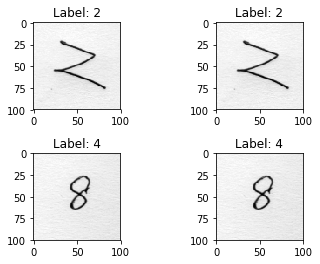

In [0]:
fig, ax = plt.subplots(nrows=2, ncols=2)
for row in ax:
    c = 0
    i = cnt
    cnt = (cnt + 1) % n
    labels = []
    for col in row:
        label = pred[c].loc[pred[c].key == files[i]].iloc[0]['label']
        labels.append(label)
        filepath = test_folder + files[i]
        img = cv2.imread(filepath, 0)
        img = cv2.resize(img, (100, 100))
        col.set_title('Label: ' + str(label))
        col.imshow(img, cmap='gray')
        c += 1
fig.subplots_adjust(hspace=0.5)
plt.show()

In [0]:
cnt

60

In [0]:
both_wrong = 3

In [0]:
only_resnet30_correct = 6

In [0]:
only_resnet50_correct = 7